<a href="https://colab.research.google.com/github/v370r/projects/blob/master/housing_all_models_piped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
%matplotlib inline 

miscillenous imports

In [2]:
from IPython.display import Image


## Data sets

In [3]:
from sklearn.datasets import load_boston
data = load_boston()
df= pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



Here’s the list of the different features and their acronyms.
       

    • CRIM per capita crime rate by town
    • ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    • INDUS proportion of non-retail business acres per town
    • CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    • NOX nitric oxides concentration (parts per 10 million)
    • RM average number of rooms per dwelling
    • AGE proportion of owner-occupied units built prior to 1940
    • DIS weighted distances to five Boston employment centres
    • RAD index of accessibility to radial highways
    • TAX full-value property-tax rate per $10,000
    • PTRATIO pupil-teacher ratio by town
    • B 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
    • LSTAT % lower status of the population
    • MEDV Median value of owner-occupied homes in $1000’s

In [4]:
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### If missing Values?
        1.   remove missing rows
        2.   remove missing attributes(worst case)
        3.   Set the value as (0,Mean,median,mode=not preferred gives bias)




In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

wait no null???


In [8]:
Image(url= "https://www.highlandernews.org/wp-content/uploads/2016/02/ops.meme_.nba_-768x576.jpg", width=200, height=200)

### Safety:

In [56]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [57]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20850000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.35914169e+01])

In [58]:
## X=imputer.transform(df)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,minmax_scale
def Pipeline(data):
    my_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),("std_scalar",StandardScaler()),])
    housing = my_pipeline.fit_transform(data) #numpy array
    return housing

In [52]:
df["CRIM"].fillna(df.CRIM.median())

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

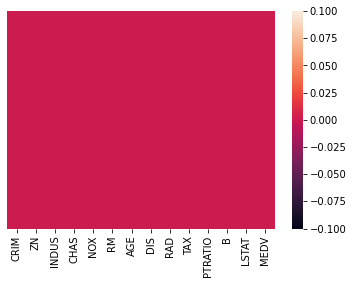

In [9]:
sns.heatmap(df.isnull(),yticklabels=False)

             CRIM        ZN     INDUS  ...         B     LSTAT      MEDV
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

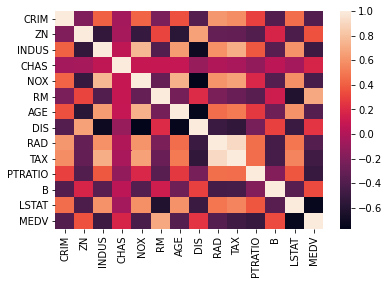

In [10]:
corr = df.corr()
print(corr)
sns.heatmap(corr,annot=False)

In [23]:
corr["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## Question:
    1.Which features are highly correlated?


In [11]:
def Correlated(dataset,threshold):
    res = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                column = corr_matrix.columns[i]
                column2 = corr_matrix.columns[j]
                res.add(column)
                res.add(column2)
    return res

In [12]:
highly_correlated_set = Correlated(df,0.7)
print(highly_correlated_set)

{'DIS', 'RAD', 'MEDV', 'NOX', 'LSTAT', 'TAX', 'INDUS', 'AGE'}


###NOTE:
    We must remove highly correlated features

#### nOT MUCH RELATED:

In [13]:
set(df.columns)-highly_correlated_set

{'B', 'CHAS', 'CRIM', 'PTRATIO', 'RM', 'ZN'}

### Ans:
    Rad and TAX are highly correlated >0.8 corr

#All models

### Using linear model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X= df[["RM","LSTAT"]].values
Y = df[["MEDV"]]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [17]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_test_predict = model_linear.predict(X_test)

In [19]:
 def PerformaceMetrics(Y_test,y_test_predict):
    print("-"*50)
    print("MSE : " , mean_squared_error(Y_test,y_test_predict))
    print("R2_score : ",r2_score(Y_test,y_test_predict))
    print("MAE : ",mean_absolute_error(y_test_predict,Y_test))
    print("-"*50)

In [20]:
PerformaceMetrics(Y_test,y_test_predict)

--------------------------------------------------
MSE :  26.39288682266608
R2_score :  0.6628996975186954
MAE :  3.7913102133431056
--------------------------------------------------


### Now:
    Lets try with KFOLD

In [21]:
?RFE

In [24]:
lm = LinearRegression()
folds=KFold(n_splits=5,shuffle=True,random_state=42)
scores =cross_val_score(lm,X_train,Y_train,scoring="r2",cv=folds)
scores

array([0.66836851, 0.74002049, 0.66431561, 0.68685352, 0.33504971])

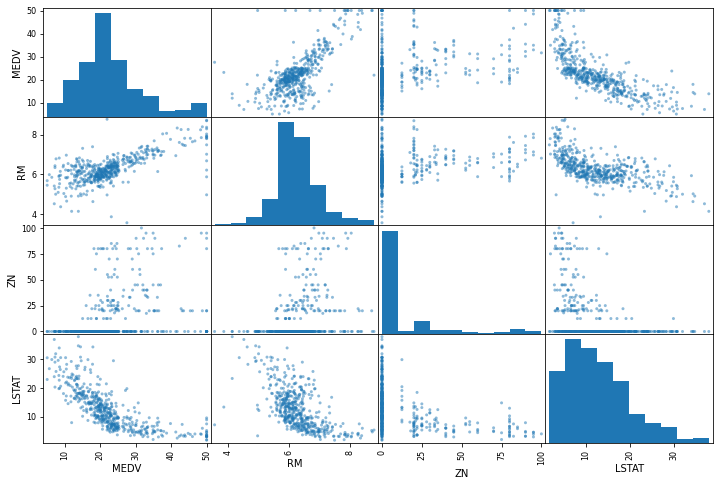

In [27]:
attributes =["MEDV","RM","ZN","LSTAT"]
pd.plotting.scatter_matrix(df[attributes],figsize=(12,8))
plt.show()

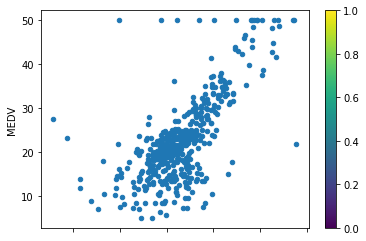

In [35]:
df.plot(kind="scatter",x="RM",y="MEDV",colorbar=True)

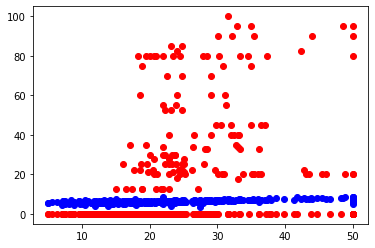

In [40]:
ax = plt.gca()
ax.scatter(df["MEDV"],df["RM"],color="b")
ax.scatter(df["MEDV"],df["ZN"],color="r")

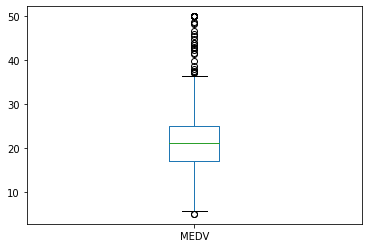

In [42]:
df.plot(kind="box",x="RM",y="MEDV")

### Question :
    Why too many outliers?


### Question:
    Whats the approximate tax per room?

In [43]:
df["TaxRM"] = df["TAX"]/df["RM"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.061984


In [48]:
df.corr()["MEDV"]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
TaxRM     -0.537650
Name: MEDV, dtype: float64

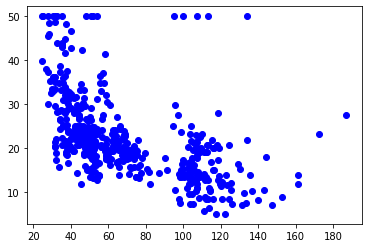

In [51]:
ax = plt.gca()
ax.scatter(y= df["MEDV"],x=df["TaxRM"],color="b")
plt.show()

### Linear Model with all columns

In [ ]:
data = np.array(df)
X = data[:,:-2]
Y = data[:,-2]

In [62]:
X_train_all,X_test_all,Y_train_all,Y_test_all = train_test_split(X,Y,shuffle=True,random_state =42)

In [64]:
model_Linear_all = LinearRegression()
model_linear.fit(X_train_all,Y_train_all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
Y_predict_all=  model_linear.predict(X_test_all)

In [67]:
PerformaceMetrics(Y_predict_all,Y_test_all)

--------------------------------------------------
MSE :  22.098694827098424
R2_score :  0.6586856202269241
MAE :  3.0609395954370906
--------------------------------------------------


In [71]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train_all,Y_train_all)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [74]:
Y_tree_predict = model_tree.predict(X_test_all)
PerformaceMetrics(Y_tree_predict,Y_test_all)

--------------------------------------------------
MSE :  10.743307086614173
R2_score :  0.849572063935927
MAE :  2.5039370078740157
--------------------------------------------------


### Till now best is tree

In [86]:
Image(url="https://www.researchgate.net/profile/Junpeng_Zhang3/publication/335156833/figure/fig1/AS:791606114385920@1565745013555/The-architecture-of-the-stacking-ensemble-learning-In-the-base-classifiers-the-training.ppm",width=400,height=300)

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train_all,Y_train_all)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [92]:
Y_Predict_forest= model_forest.predict(X_test_all)
PerformaceMetrics(Y_test_all,Y_Predict_forest)

--------------------------------------------------
MSE :  10.268020330708659
R2_score :  0.8533708531451716
MAE :  2.1425984251968497
--------------------------------------------------


So far best Random forest


    Lets try XGbooster!

In [96]:
from xgboost import XGBRegressor

In [125]:
model_xgb = XGBRegressor(learning_rate=0.4,random_state=42,max_depth=3)

In [126]:
model_xgb.fit(X_train_all,Y_train_all)

[07:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [127]:
Y_xgb_predict= model_xgb.predict(X_test_all)
PerformaceMetrics(Y_xgb_predict,Y_test_all)

--------------------------------------------------
MSE :  8.957881926231023
R2_score :  0.8504372064924125
MAE :  2.003628152561939
--------------------------------------------------


In [128]:
from joblib import dump,load

In [129]:
dump(model_forest,"Decision_Model")

['Decision_Model']